<h1>Homework 1

<h2>第一題 [myknn_regressor]

<h3>Q1.1

In [1]:
import numpy as np

# KNN functions
class myknn_regressor():
    def __init__(self, n_neighbors = 10, mean_type = "equal_weight"):
        """mean_type can be equal_weight or remove_outliers.
                      equal_weight use the same weight for all neighbors.
                      remove_outliers remove neighbors out in [Q1 - 1.5 IQR, Q3 + 1.5IQR]."""
        self.k = n_neighbors
        if mean_type == "remove_outliers" and self.k >= 10:
            self.remove = 1;
        else:
            self.remove = 0;

    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train

    def predict(self, x_test):
        """use remove_outliers only if k>=10"""
        self.y_pred = []
        for u in range(x_test.shape[0]):
            # Calculate distance
            distance = []
            for i in range(self.x_train.shape[0]):
                distance.append(np.sum(np.square(x_test[u,:] - self.x_train[i,:])))
            
            # Choose K nearest
            k_nearest = []
            for v in range(self.k):
                temp = np.argmin(distance)
                k_nearest.append(self.y_train[temp])
                distance[temp] = 9999999999
            
            # Remove outliers
            if self.remove == 1:
                q1 = np.quantile(k_nearest, .25)
                q3 = np.quantile(k_nearest, .75)
                iqr = q3 - q1
                ub = q3 + (1.5 * iqr)
                lb = q1 - (1.5 * iqr)
                nk_nearest = []
                for y in k_nearest:
                    if y >= lb and y <= ub:
                        nk_nearest.append(y)
                k_nearest = nk_nearest
               
            # Predict y
            Ypred = 0
            for y in k_nearest:
                Ypred += y
            Ypred = (Ypred / len(k_nearest))
            self.y_pred.append(Ypred)
                
        return self.y_pred

In [2]:
# Import training and testing data
import pickle
from sklearn import preprocessing
import numpy as np

# Load data
with open('msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

doscaling = 1

if (doscaling == 1):
    xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
    #standardize feature values
    X_train = xscaler.transform(msd_data['X_train'])
    X_test = xscaler.transform(msd_data['X_test'])
else:
    X_train = msd_data['X_train']
    X_test = msd_data['X_test']

Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']

<h3>Q1.2

In [3]:
# RMSE Calculator
def RMSE(y_test, y_pred):
    return (np.sum(np.square(y_test - y_pred)) / y_test.shape[0]) ** 0.5

In [4]:
# Main executing code
myknn = myknn_regressor(20, "equal_weight")
myknn.fit(X_train, Y_train)
ypred2 = myknn.predict(X_test)

In [5]:
# RMSE and 20 data
print("RMSE =", RMSE(Y_test, ypred2))
for i in range(20):
    print("Prediction", i + 1, ":", ypred2[i])

RMSE = 10.25126451549596
Prediction 1 : 1993.35
Prediction 2 : 1993.8
Prediction 3 : 2000.65
Prediction 4 : 1991.5
Prediction 5 : 1992.8
Prediction 6 : 1998.5
Prediction 7 : 1988.1
Prediction 8 : 1991.65
Prediction 9 : 2002.25
Prediction 10 : 2003.0
Prediction 11 : 2000.5
Prediction 12 : 1998.65
Prediction 13 : 1995.55
Prediction 14 : 1997.2
Prediction 15 : 1995.05
Prediction 16 : 1997.4
Prediction 17 : 1992.15
Prediction 18 : 2000.45
Prediction 19 : 2003.2
Prediction 20 : 1995.75


<h3>Q1.3

In [6]:
# Main executing code
myknn = myknn_regressor(20, "remove_outliers")
myknn.fit(X_train, Y_train)
ypred3 = myknn.predict(X_test)

In [7]:
# RMSE and 20 data
print("RMSE =", RMSE(Y_test, ypred3))
for i in range(20):
    print("Prediction", i + 1, ":", ypred3[i])

RMSE = 10.212572466080376
Prediction 1 : 1993.35
Prediction 2 : 1993.8
Prediction 3 : 2000.65
Prediction 4 : 1992.7368421052631
Prediction 5 : 1992.8
Prediction 6 : 2000.0
Prediction 7 : 1988.1
Prediction 8 : 1991.65
Prediction 9 : 2002.25
Prediction 10 : 2003.9473684210527
Prediction 11 : 2000.5
Prediction 12 : 2000.9444444444443
Prediction 13 : 1995.55
Prediction 14 : 1997.2
Prediction 15 : 1998.611111111111
Prediction 16 : 1997.4
Prediction 17 : 1992.15
Prediction 18 : 2003.8333333333333
Prediction 19 : 2003.2
Prediction 20 : 1995.75


<h2>第二題 [Tuning the Hyper-parameter]

In [8]:
k = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 80, 100, 120, 140, 160, 180, 200]

<h3>Q2.1

In [9]:
# Import training and testing data
import pickle
from sklearn import preprocessing
import numpy as np

# Load data
with open('msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

doscaling = 1

if (doscaling == 1):
    xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
    #standardize feature values
    X_train = xscaler.transform(msd_data['X_train'])
    X_test = xscaler.transform(msd_data['X_test'])
else:
    X_train = msd_data['X_train']
    X_test = msd_data['X_test']

Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']

In [10]:
# Calculate RMSE
from sklearn.neighbors import KNeighborsRegressor

q1_rmse = []
for i in k:
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(X_train, Y_train)
    ypred1 = neigh.predict(X_test)
    
    q1_rmse.append(RMSE(Y_test, ypred1))

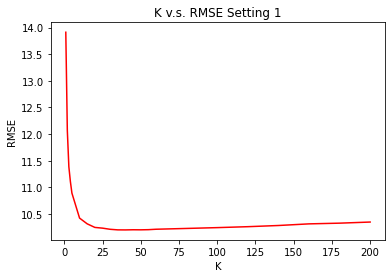

In [11]:
# Display plot
import matplotlib.pyplot as plt

plt.plot(k, q1_rmse, color='red')
plt.xlabel("K")
plt.ylabel("RMSE")
plt.title("K v.s. RMSE " + "Setting 1")
plt.show()

<h3>Q2.2

In [12]:
# Import training and testing data
import pickle
from sklearn import preprocessing
import numpy as np

# Load data
with open('msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

doscaling = 0

if (doscaling == 1):
    xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
    #standardize feature values
    X_train = xscaler.transform(msd_data['X_train'])
    X_test = xscaler.transform(msd_data['X_test'])
else:
    X_train = msd_data['X_train']
    X_test = msd_data['X_test']

Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']

In [13]:
# Calculate RMSE
from sklearn.neighbors import KNeighborsRegressor

q2_rmse = []
for i in k:
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(X_train, Y_train)
    ypred2 = neigh.predict(X_test)
    
    q2_rmse.append(RMSE(Y_test, ypred2))

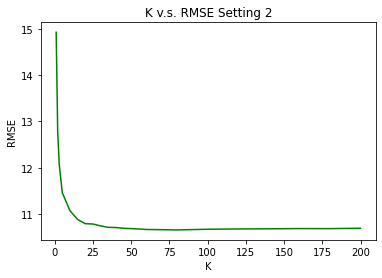

In [14]:
import matplotlib.pyplot as plt

plt.plot(k, q2_rmse, color='green')
plt.xlabel("K")
plt.ylabel("RMSE")
plt.title("K v.s. RMSE " + "Setting 2")
plt.show()

<h3>Q2.3

In [15]:
# Import training and testing data
import pickle
from sklearn import preprocessing
import numpy as np

# Load data
with open('msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

doscaling = 1

if (doscaling == 1):
    xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
    #standardize feature values
    X_train = xscaler.transform(msd_data['X_train'])
    X_test = xscaler.transform(msd_data['X_test'])
else:
    X_train = msd_data['X_train']
    X_test = msd_data['X_test']

Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']

In [16]:
# Calculate RMSE
q3_rmse = []
for i in k:
    myknn = myknn_regressor(i, "remove_outliers")
    myknn.fit(X_train, Y_train)
    ypred3 = myknn.predict(X_test)
    
    q3_rmse.append(RMSE(Y_test, ypred3))

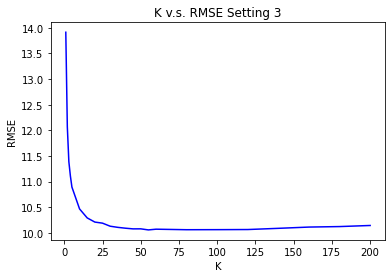

In [17]:
# Display plot
import matplotlib.pyplot as plt

plt.plot(k, q3_rmse, color='blue')
plt.xlabel("K")
plt.ylabel("RMSE")
plt.title("K v.s. RMSE " + "Setting 3")
plt.show()

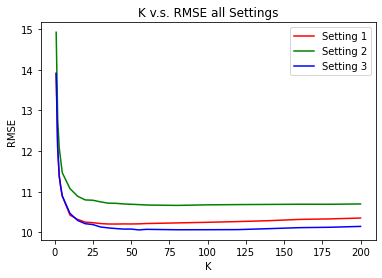

In [18]:
# Display all plots in the same figure
import matplotlib.pyplot as plt

plt.plot(k, q1_rmse, color='red', label="Setting 1")
plt.plot(k, q2_rmse, color='green', label="Setting 2")
plt.plot(k, q3_rmse, color='blue', label="Setting 3")
plt.legend()

plt.xlabel("K")
plt.ylabel("RMSE")
plt.title("K v.s. RMSE all Settings")
plt.show()

Observations:<br>
(1) According to the graphs above, RMSE decreases significantly before k = 50 and increases a little bit after k = 50 in all three kinds of settings.<br>
(2) From the last graph, we can see that setting 3 by using standardized features and removing outliers RMSE is the lowest among all the other settings, which implies better performance.

<h2>第三題 [Lasso Regression]

<h3>Q3.1

The results below is proved by the similar process in the lecture note, there are just a few differences:<br>
(1) The first term in the loss fuction has 1/n as a scalar which won't be differentiated in the process.<br>
(2) The term $w_0$ is added to the loss function, which can be differentiated similar to the first term.<br>
Thus, the results are shown as below:

(1) If $j \neq 0$:<br>
If $ W_j > 0$:
$$ W_j = \frac{\sum_{i=1}^n (y_i - \mathbf{\widetilde {w}}^T_{-j} x_{i, -j}) x_{i, j} - \widetilde {w}_0 \sum_{i=1}^n x_{i,j} - n \lambda}{ \sum_{i=1}^n (x_{i,j}) ^ 2} $$<br>
If $ W_j < 0$:
$$ W_j = \frac{\sum_{i=1}^n (y_i - \mathbf{\widetilde {w}}^T_{-j} x_{i, -j}) x_{i, j} - \widetilde {w}_0 \sum_{i=1}^n x_{i,j} + n \lambda}{ \sum_{i=1}^n (x_{i,j}) ^ 2} $$<br>
Otherwise:
$$ W_j = 0 $$<br>

(2) If $j = 0$:<br>
$$ W_j = \frac{\sum_{i=1}^n (y_i - \mathbf{\widetilde {w}}^T_{-j} x_{i, -j})}{n} $$<br>

<h3>Q3.2

We apply the results in Q3.1 to create the Lasso regression code, and the exact same result in class note to create the Ridge regression code.

In [19]:
import numpy as np
np.set_printoptions(suppress=True)

class mylasso():
    def __init__(self, lamcoef = 0.1, max_iter=1000, tol=1e-6, const_regu = False):
        """lamcoef: the regularization coefficient
           max_iter: maximum number of iteration for model training
           tol: tolerance for the stopping criteria for model training
           const_regu: whether the constant term should be regularized, default to False
           """
        self.lamcoef = lamcoef
        self.max_iter = max_iter
        self.tol = tol
        self.const_reg = const_regu

    def fit(self, x_train, y_train, winit = "ridge", keep_traindata = True, verbose = False):
        """Fit a Lasso model
           x_train: a numpy matrix that contains training features
           y_train: a numpy matrix that contains the label
           winit: how weights are initialized, default to "ridge", ridge regression
           keep_traindata: whether the object is going to keep training data after the training process completed
           verbose: output a lot of message"""
        # Array preprocessing
        firstCol = np.ones((x_train.shape[0], 1))
        ones_x_train = np.concatenate([firstCol, x_train], axis=1)
        n = ones_x_train.shape[0]
        
        # Ridge regression
        self.w_t = (np.dot(np.linalg.inv(self.lamcoef * np.eye(ones_x_train.shape[1]) + np.dot(ones_x_train.T, ones_x_train)), np.dot(ones_x_train.T, y_train))).T
            # calculate loss
        RS = y_train - np.dot(self.w_t, ones_x_train.T)
        if self.const_reg == False:
            self.L = (np.dot(RS, RS.T) / (2 * n)) + (self.lamcoef * np.sum(np.absolute(np.delete(self.w_t, 0))))
        else:
            self.L = (np.dot(RS, RS.T) / (2 * n)) + (self.lamcoef * np.sum(np.absolute(self.w_t)))
            
        # Lasso regression
        for itr in range(self.max_iter):
                # Coordinate Descent with Soft Thresholding
            for j in range(len(self.w_t)):

                wj_star = np.dot((y_train - np.dot(np.delete(self.w_t, j), np.delete(ones_x_train.T, j, 0))), ones_x_train[:, j][np.newaxis].T) / (np.dot(ones_x_train[:, j], ones_x_train[:, j][np.newaxis].T))
                
                if ((self.const_reg == False) and (j == 0)):
                    self.w_t[j] = wj_star
                    continue
                else:
                    soft_thre = ((self.lamcoef * n) / (np.dot(ones_x_train[:, j], ones_x_train[:, j][np.newaxis].T)))
                
                if wj_star > soft_thre:
                    self.w_t[j] = (wj_star - soft_thre)
                elif wj_star < (-soft_thre):
                    self.w_t[j] = (wj_star + soft_thre)
                else:
                    self.w_t[j] = 0
                    
                # calculate loss
            RS = y_train - np.dot(self.w_t, (ones_x_train).T)
            if self.const_reg == False:
                tempL = (np.dot(RS, RS.T) / (2 * n)) + (self.lamcoef * np.sum(np.absolute(np.delete(self.w_t, 0))))
            else:
                tempL = (np.dot(RS, RS.T) / (2 * n)) + (self.lamcoef * np.sum(np.absolute(self.w_t)))
                
                # loss constraint
            if (self.L - tempL) < self.tol:
                self.L = tempL
                break
            
                # save loss
            self.L = tempL
        
        # Keep training data
        if(keep_traindata == True):
            self.x_train = np.array(x_train)
            self.y_train = np.array(y_train)

    def predict(self, x_test):
        """Make prediction using trained model"""
        firstCol = np.ones((x_test.shape[0], 1))
        ones_x_test = np.concatenate([firstCol, x_test], axis=1)
        return np.dot(self.w_t, ones_x_test.T), self.L, self.w_t

In [20]:
#load the dataset, and create normalized and raw features. 
import pickle
from sklearn import preprocessing
import numpy as np
np.set_printoptions(suppress=True)

#Load data
with open('msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
#standardize feature values
X_train = xscaler.transform(msd_data['X_train'])
X_test = xscaler.transform(msd_data['X_test'])

#outcome values
Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']

<h3>Q3.3

In [21]:
# MAE calculator
def MAE(y_test, y_pred):
    return (np.sum(np.absolute(y_test - y_pred)) / y_test.shape[0])

In [22]:
# Main executing code
mlo = mylasso(lamcoef = 0.1)
mlo.fit(X_train, Y_train)
ypred3, loss3, w3 = mlo.predict(X_train)

In [23]:
# Display code
print("Training Loss:", loss3)
print("RMSE in Training Data:", RMSE(Y_train, ypred3))
print("MAE in Training Data:", MAE(Y_train, ypred3))
print("Intercept:", w3[0])
print("Feature Weights:\n", w3[1:])
print("Number of Nonzero Weights:", np.count_nonzero(w3[1:]))

Training Loss: 49.888404109953655
RMSE in Training Data: 9.719499089084628
MAE in Training Data: 6.980898009625176
Intercept: 1998.2660000000012
Feature Weights:
 [ 4.6518551  -2.45673153 -1.06195885  0.         -0.34275054 -2.94854329
  0.         -0.39970268 -0.42653866  0.         -0.23498651 -0.39491058
  0.50307719  0.         -0.34207893  0.61674589  0.15722753  0.43489925
  0.43595375  1.12941661  0.40663481  0.          1.77743607  0.
 -0.16842728  0.07833529  0.66391172  0.01297938  0.15350723  0.
 -0.21762074 -0.22189107  0.         -0.0027548  -0.01707674 -0.2599464
  0.          0.28969362  0.34893387  0.         -0.26112569 -0.14488702
 -0.00995271  0.03497723 -0.03984338  0.          0.00299383 -0.17804306
  0.          0.06494382  0.27076506  0.          0.          0.
  0.          0.         -0.63813223  0.23761428 -0.19016387  0.
 -0.18875525  0.         -0.13590668  0.0612754  -0.26619017  0.
  0.          0.         -0.03099184  0.         -0.19276517  0.01221358
  

<h3>Q3.4

In [24]:
# Main executing code
mlo = mylasso(lamcoef = 0.1)
mlo.fit(X_train, Y_train)
ypred4, loss4, w4 = mlo.predict(X_test)

In [25]:
# Display code
print("前五筆資料的預測年分:", ypred4[:5])
print("RMSE in Testing Data:", RMSE(Y_test, ypred4))
print("MAE in Testing Data:", MAE(Y_test, ypred4))

前五筆資料的預測年分: [1991.93191145 1999.07198637 2001.76293602 1991.30317029 1994.42657933]
RMSE in Testing Data: 9.648414790970701
MAE in Testing Data: 6.9213859614965125


<h3>Q3.5

In [26]:
# Main executing code
training_loss = []
nonzero_weights = []
average_weight = []
RMSE_Training = []
RMSE_Test = []
lam = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2]

for i in lam:
    mlo = mylasso(lamcoef = i)
    mlo.fit(X_train, Y_train)
    ypred_train, loss, w = mlo.predict(X_train)
    ypred_test, loss, w = mlo.predict(X_test)
    
    training_loss.append(loss)
    nonzero_weights.append(np.count_nonzero(w[1:]))
    average_weight.append(np.average(np.absolute(w[1:])))
    RMSE_Training.append(RMSE(Y_train, ypred_train))
    RMSE_Test.append(RMSE(Y_test, ypred_test))

,lambda,Training Loss,Number of Nonzero Weights,Average Weight Size (Mean of Absolute Weight),Training RMSE,Test RMSE
0,0.0001,46.570461,90,0.470656,9.650516,9.644374
1,0.0005,46.587379,90,0.469507,9.650518,9.644092
2,0.0010,46.608460,90,0.467906,9.650528,9.643539
3,0.0050,46.774657,89,0.455754,9.650862,9.640064
4,0.0100,46.976826,87,0.442903,9.651758,9.636408
5,0.0500,48.417390,76,0.363977,9.672589,9.626434
6,0.1000,49.888404,59,0.294897,9.719499,9.648415
7,0.5000,56.375688,16,0.120031,10.096958,9.999131
8,1.0000,59.889324,4,0.042175,10.591844,10.474621
9,2.0000,61.492131,1,0.004266,11.020374,10.902614


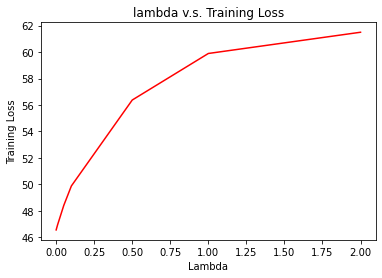

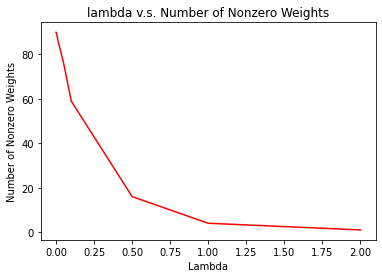

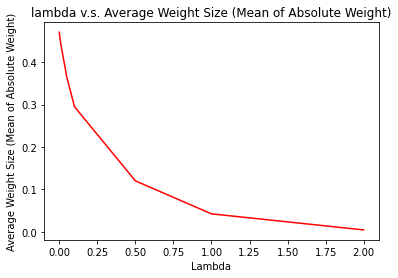

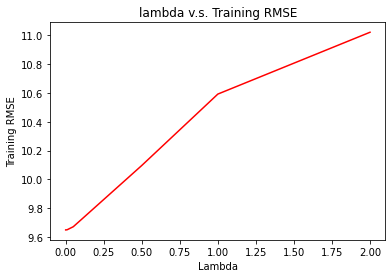

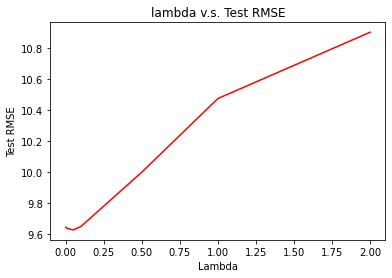

In [27]:
# Display code
import pandas as pd

data = {"lambda" : lam,
        "Training Loss" : training_loss,
        "Number of Nonzero Weights" : nonzero_weights,
        "Average Weight Size (Mean of Absolute Weight)" : average_weight,
        "Training RMSE" : RMSE_Training,
        "Test RMSE" : RMSE_Test}
df = pd.DataFrame(data)
display(df)

import matplotlib.pyplot as plt

col = df.columns
for i in range(1, 6):
    plt.plot(df.iloc[:, 0], df.iloc[:, i], color='red')
    plt.xlabel("Lambda")
    plt.ylabel(col[i])
    plt.title("lambda v.s. " + col[i])
    plt.show()

Observations:<br>
When lambda increases, Training Loss, Training RMSE and Test RMSE increases.<br>
Number of Nonzero Weights, Average Weight Size decreases.<br>
However, we can see some minor RMSE decrease on the test data when lambda is close to 0 but not 0.